#Script Code for Creating individual CSV files for each indicator to be evaluated.#

##First File- "EngSTAAR_Merged_UNSATGL"##
###*Merged by campus name*###

e1_all_unsatgl_rm : % Did Not Meet Grade Level Performance -- English I -- All Students

e2_all_unsatgl_rm : % Did Not Meet Grade Level Performance -- English II -- All Students

In [0]:
import pandas as pd
EngII_2018= pd.read_csv("https://tea.texas.gov/WorkArea/DownloadAsset.aspx?id=51539615814")
EngI_2017= pd.read_csv("https://tea.texas.gov/WorkArea/DownloadAsset.aspx?id=51539615812")

EngSTAAR_Merged= EngI_2017.merge(EngII_2018, on="CNAME", how="inner")
#print(EngSTAAR_Merged.sample(50))

EngSTAAR_Merged_UNSATGL= EngSTAAR_Merged[["CNAME","e1_all_unsatgl_rm","e2_all_unsatgl_rm"]]
#print(EngSTAAR_Merged_UNSATGL)

#EngSTAAR_Merged_UNSATGL.to_csv('EngSTAAR_Merged_UNSATGL.csv')


#Cleaning Data- removing rows with any empty cells#

In [0]:
import csv

### Replace with path to your file ###
inputFile = 'EngSTAAR_Merged_UNSATGL.csv'
outputFile = 'EngSTAAR_Merged_UNSATGL_clean.csv'

output = []

with open(inputFile, 'r') as inputRows:
    reader = csv.reader(inputRows)
    # Loop through rows
    for row in reader:
        hasMissingValues = False
        # Check each cell
        for cell in row:
            if cell in (None, ""):
                hasMissingValues = True
                continue
        # Add to output if there are NO missing values
        if not hasMissingValues:
            output.append(row)

with open(outputFile, 'w') as outputRows:
    writer = csv.writer(outputRows, delimiter=',')
    for row in output:
        writer.writerow(row)

#EngSTAAR_Merged_UNSATGL_clean.csv is "cleaned" by taking out all blanks

#df = pd.read_csv("EngSTAAR_Merged_UNSATGL_clean_headers.csv")
#print(df)

#Checking data for missing cells; re-labeled first column so it wasn't deleted "N-samples"#

In [0]:
df = pd.read_csv("EngSTAAR_Merged_UNSATGL_clean_headers.csv")
#print(df)

#Importing pandas, code, and taking a look at the data from % of students not meeting grade level performance from 2017 (e1) and 2018 (e2)#

In [4]:
import pandas as pd

df = pd.read_csv("EngSTAAR_Merged_UNSATGL_clean_headers.csv")

df[['e1_all_unsatgl_rm','e2_all_unsatgl_rm']].describe()



,e1_all_unsatgl_rm,e2_all_unsatgl_rm
count,3491.000000,3491.000000
mean,47.402177,44.742194
std,24.137995,23.433170
min,0.000000,0.000000
25%,30.000000,27.000000
50%,45.000000,41.000000
75%,67.000000,61.000000
max,100.000000,100.000000


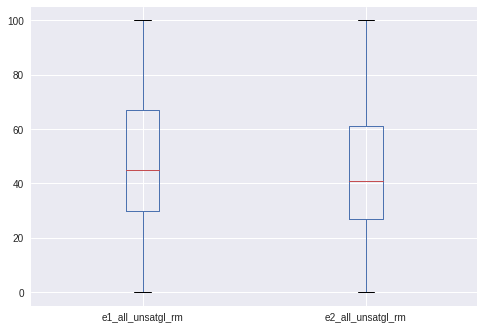

In [0]:
from scipy import stats
import matplotlib.pyplot as plt

df[['e1_all_unsatgl_rm', 'e2_all_unsatgl_rm']].plot(kind='box')

# This saves the plot as a png file

plt.savefig('boxplot_outliers.png')

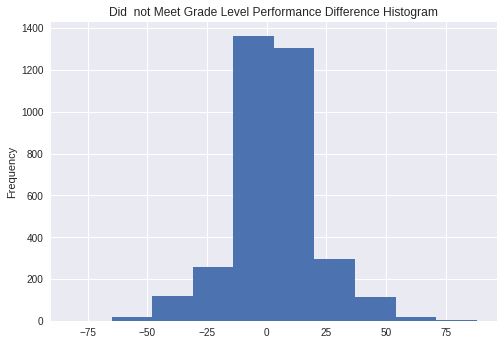

In [0]:
df['unsatgl_difference'] = df['e1_all_unsatgl_rm'] - df['e2_all_unsatgl_rm']

df['unsatgl_difference'].plot(kind='hist', title= 'Did  not Meet Grade Level Performance Difference Histogram')

#Again, this saves the plot as a png file

plt.savefig('Did  not Meet Grade Level Performance difference histogram.png')

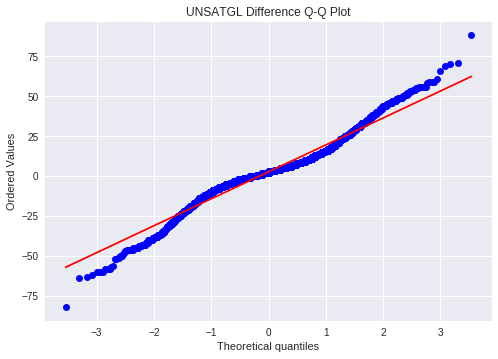

In [0]:
stats.probplot(df['unsatgl_difference'], plot= plt)
plt.title('UNSATGL Difference Q-Q Plot')
plt.savefig('UNSATGL difference qq plot.png')

#Paired T-Test#
###Significant###

Statistic = 9.128

P-value= 1.14d-19

In [0]:
stats.ttest_rel(df['e1_all_unsatgl_rm'], df['e2_all_unsatgl_rm'])

Ttest_relResult(statistic=9.128761115543066, pvalue=1.1439806828782533e-19)